In [1]:
# https://towardsdatascience.com/multi-armed-bandits-ucb-algorithm-fa7861417d8c

import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## Multi Armed Bandit : UCB strategy

### Takeaways:

1. There are 1000 independant episodes and each episode has 1000 iters
2. For each episode, mu is held the same for all iteraltions and is initialized for each bandit at the beginning of the episode. In this example sigma is 1 for all bandits
3. n at the end of the episode is 1001 instead of iter=1000 because it is initialized as n=1 and not n=0
4. sum(k_n) is iter+k instead of iter as k_n is initialized as np.ones(k) and not np.zeros(k) for practical reasons so NaN issues don't arise


In [2]:
class ucb_bandit:
    '''
    Upper Confidence Bound Bandit
    
    Inputs 
    ============================================
    k: number of arms (int)
    c:
    iters: number of steps (int)
    mu: set the average rewards for each of the k-arms.
        Set to "random" for the rewards to be selected from
        a normal distribution with mean = 0. 
        Set to "sequence" for the means to be ordered from 
        0 to k-1.
        Pass a list or array of length = k for user-defined
        values.
    '''
    def __init__(self, k, c, iters, mu='random'):
        # Number of arms
        self.k = k
        
        # Exploration parameter
        self.c = c
        
        # Number of iterations
        self.iters = iters
        
        # Step count total
        self.n = 1 # Good!! This causes final n to be iter+1 
        
        # Step count for each arm
        self.k_n = np.ones(k) # Good!! This causes final n to be iter+k
        
        # Total mean reward
        self.mean_reward = 0
        
        self.reward = np.zeros(iters)
        
        # Mean reward for each arm
        self.k_reward = np.zeros(k)
        
        if type(mu) == list or type(mu).__module__ == np.__name__:
            # User-defined averages            
            self.mu = np.array(mu)
        elif mu == 'random':                   
            # Draw means from probability distribution
            self.mu = np.random.normal(0, 1, k) # means are constant for one episode
        elif mu == 'sequence':
            # Increase the mean for each arm by one
            self.mu = np.linspace(0, k-1, k)
        
    def pull(self):
        # Select action according to UCB Criteria
        a = np.argmax(self.k_reward + self.c * np.sqrt(
                (np.log(self.n)) / self.k_n))
            
        reward = np.random.normal(self.mu[a], 1) # the mean is same as initialized and are constant for one episode, 
                                                    #stdev =1 is fixed can be altered
        
        # Update counts
        self.n += 1
        self.k_n[a] += 1
        
        # Update total
        self.mean_reward = self.mean_reward + (
            reward - self.mean_reward) / self.n
        
        # Update results for k
        self.k_reward[a] = self.k_reward[a] + (
            reward - self.k_reward[a]) / self.k_n[a]
        
    def run(self):
        for i in range(self.iters):
            self.pull()
            self.reward[i] = self.mean_reward
            
    def reset(self, mu=None):
        # Resets results while keeping settings
        self.n = 1
        self.k_n = np.ones(self.k)
        self.mean_reward = 0
        self.reward = np.zeros(iters)
        self.k_reward = np.zeros(self.k)
        if mu == 'random':
            self.mu = np.random.normal(0, 1, self.k) # means are constant for one episode

In [3]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [3]:
k = 5 # number of arms

iters = 1000
ucb_rewards = np.zeros(iters)

# Initialize bandits
ucb = ucb_bandit(k, 2, iters) # c=2 
episodes = 1000

# Run experiments
for i in range(episodes): 
    ucb.reset('random')
    # Run experiments
    ucb.run()
    
    # Update long-term averages for each iteration ucb.reward has same size as ucb_rewards = np.zeros(iters)
    ucb_rewards = ucb_rewards + (
        ucb.reward - ucb_rewards) / (i + 1)
    


Text(0.5, 1.0, 'Average UCB Rewards after 1000 Episodes')

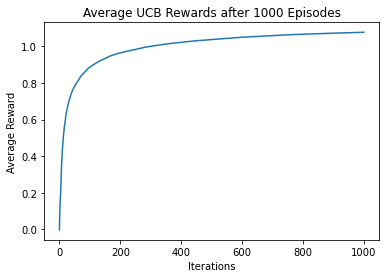

In [4]:
plt.plot(ucb_rewards)
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average UCB Rewards after " + str(episodes) + " Episodes")

Text(0.5, 1.0, 'Action Number Selected by UCB')

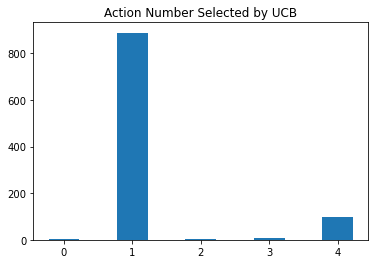

In [5]:
width = 0.45
bins = np.linspace(0, k-1, k) 

plt.bar(bins,ucb.k_n, width=width, label="UCB")
plt.title("Action Number Selected by UCB")

# This is result for only one episode

In [7]:
opt_per = np.array([ucb.k_n]) / iters * 100
df = pd.DataFrame(np.vstack(
    [opt_per.round(2), 
    ucb.mu.round(2)]), 
        index=["UCB", "Expected Reward"],
        columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

# This is result for only one episode

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4
UCB,0.50,88.90,0.50,0.70,9.9
Expected Reward,-1.75,0.79,-1.87,-1.06,0.7
